In [56]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

M, n = 100, 500

x = np.zeros((M, n+1))
y = np.zeros((M, n))
means = np.zeros_like(x)

sigma = 0.5

for j in range(M):
    m, p = 0, 1
    x[j, 0] = np.random.normal(m, p)
    for k in range(n):
        x[j, k + 1] = x[j, k] + np.random.normal()
        y[j, k] = x[j, k + 1] + np.random.normal()
        m_, p_ = m, p + 1
        q = y[j, k] - m_
        s = p_ + 1
        t = p_ / s
        m, p = m_ + t * q, p_ - s * t**2
        means[j, k + 1] = m

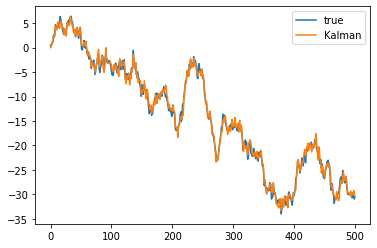

In [57]:
plt.plot(np.arange(n+1), x[0], label='true')
plt.plot(np.arange(n+1), means[0], label='Kalman')
plt.legend()

In [58]:
from scipy import stats
from tqdm.auto import tqdm

N = 100

x_e = np.zeros((M, n+1, N))
x[:, 0] = np.random.normal(size=N)

for j in range(M):
    for k in range(n):
        x[j, k + 1] = np.random.normal(x[j, k], size=N)
        w_p = stats.norm.cdf(y[j, k], loc=x[j, k + 1])
        w_p = w_p / sum(w_p)
        z = np.random.choice(np.arange(N), N, replace=True, p=w_p)
        x[j] = x[j, :, z].T

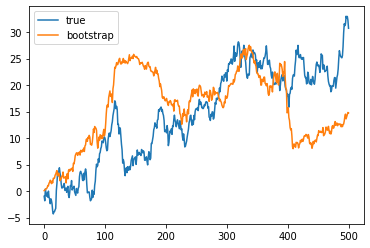

In [55]:
plt.plot(np.arange(n+1), x[0], label='true')
plt.plot(np.arange(n+1), x_e[0], label='bootstrap')
plt.legend()

In [37]:
x_e[0][:10]

array([0.0963355 , 0.15259455, 0.3828438 , 0.41622166, 0.48373358,
       0.67875146, 1.06068984, 1.00072387, 1.50823055, 1.67887394])

In [38]:
x[0][:10]

array([ 0.60960903,  0.44831732,  0.24369382, -0.00399414, -0.27265656,
        0.25363205,  0.46410877, -0.76520326,  0.00820613, -0.1173176 ])

In [5]:
stats.norm.pdf(x_p[0, :], loc=x_p[0, :])

array([0.39894228, 0.39894228])

In [25]:
np.random.randn(4, 10, n)[:,:,0].shape

(4, 10)